In [1]:
## Importar librerias
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [46]:
df = pd.read_csv("../data/raw/data.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [13]:
df[df['CREDIT_LIMIT' ].isna()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [14]:
df[df['MINIMUM_PAYMENTS' ].isna()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     1666.670542           0.636364    1499.00           1499.00   
45    2242.311686           1.000000     437.00             97.00   
47    3910.111237           1.000000       0.00              0.00   
54       6.660517           0.636364     310.00              0.00   
55    1311.995984           1.000000    1283.90           1283.90   
...           ...                ...        ...               ...   
8919    14.524779           0.333333     152.00            152.00   
8929   371.527312           0.333333       0.00              0.00   
8935   183.817004           1.000000     465.90              0.00   
8944   193.571722           0.833333    1012.73           1012.73   
8946    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN               0.0       6  
8929    0.000000               NaN               0.0       6  
8935    0.000000   

In [47]:
# Convertimos valores nulos a 0
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(0)

In [48]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0)

In [49]:
# Eliminamos la variable ID
df = df.drop('CUST_ID', axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [51]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000          0.000000          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [52]:
## Normalizamos los datos
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear el scaler
scaler = MinMaxScaler()

# Normalizar el DataFrame
df_normalizado = pd.DataFrame(scaler.fit_transform(df), 
                             columns=df.columns)

In [26]:
df_normalizado.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.033333   
1                0.166667           0.03252       0.000000      0.233333   
2                0.000000           0.00000       0.033520      0.250000   
3                0.055555           0.00813       0.002793      0.250000   
4                0.000000           0.00000       0.002793      0.040000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.003979          0.001826          0.000000     1.0  
1  0.080893          0.014035          0.222222     1.0  
2  0.012264          0.008210          0.000000     1.0  
3  0.000000          0.000000          0.000000     1.0  
4  0.013374          0.003204          0.000000     1.0

## PCA para reducir la dimensionalidad

In [64]:
from sklearn.decomposition import PCA

# Crear un objeto PCA y ajustarlo a los datos
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(df)

In [65]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['PCA1','PCA2','PCA3','PCA4'])
X_pca_df.sample(10)

PCA1         PCA2         PCA3         PCA4
1611 -1921.580909  -620.180157 -1615.723008   120.274410
3337 -1990.954564  -807.651856   430.698354  -280.914042
272   5821.093504 -3373.601591 -6206.643955  1281.161575
4367 -3322.176816   603.995568  1094.121801  -298.615300
4751 -2443.803774   632.944437  -693.755280    94.536419
7579 -2669.229132  1347.884777  1602.360219   202.234238
2847 -1449.606896  1273.968594  -861.239748   263.430741
1491  7059.094408 -3361.650654  4758.625855 -6510.782244
824     73.503371  5090.013278  -716.696990  1630.823770
3074  -217.538438   635.947972  3793.157278  1499.754094

In [66]:
### Varianza emplicada por las componentes
var = pca.explained_variance_ratio_
var

array([0.47540672, 0.17759459, 0.140251  , 0.11347324])

## Búsqueda del número de clusters

### DATAFRAME ORIGINAL

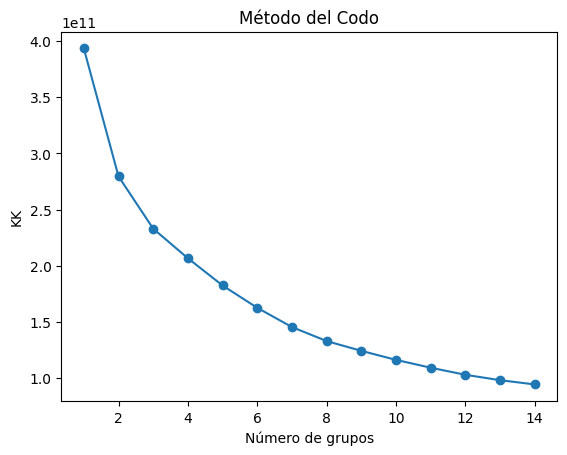

In [22]:
### Busqueda de El K
import matplotlib.pyplot as plt

KK = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df)
    KK.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 15), KK, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

En el método del codo podemos ver que ya no existe demasiada variación entre los grupos 4 y 6, justamente donde se forma el cod. Por lo tanto el número de clusters a segmentar sería menor que 5.

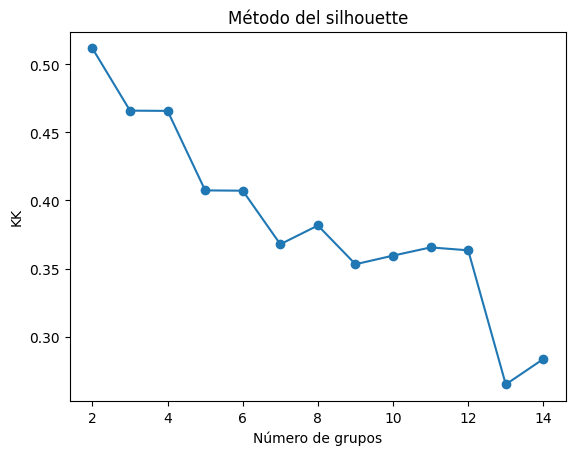

In [23]:
### Importar libreria
from sklearn.metrics import silhouette_score
from sklearn import metrics

import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df)

    predict = kmeans.predict(df)
    silhouette_avg = metrics.silhouette_score(df, predict)
    silhouette_scores.append(silhouette_avg)

# Gráfico del codo
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método del silhouette')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

La gráfica nos indica que todo lo que esté por encima del 0.5, es considerado un buen cluster. Vemos que pasado los 4 grupos, los clusters ya no son confiables. Entonces lo recomendable sería segmentar los grupos en 4.

### DATAFRAME NORMALIZADO

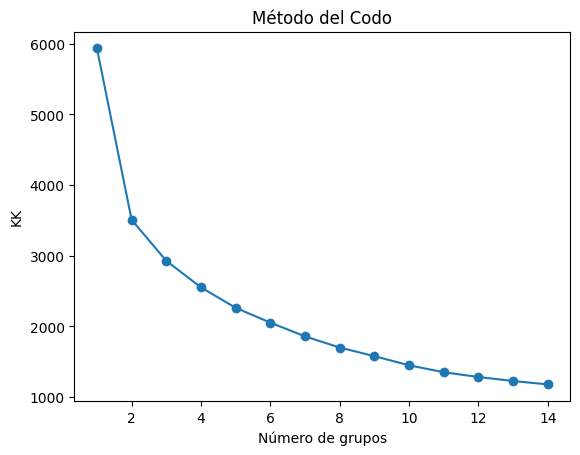

In [27]:
### Busqueda de El K
import matplotlib.pyplot as plt

KK = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_normalizado)
    KK.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 15), KK, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

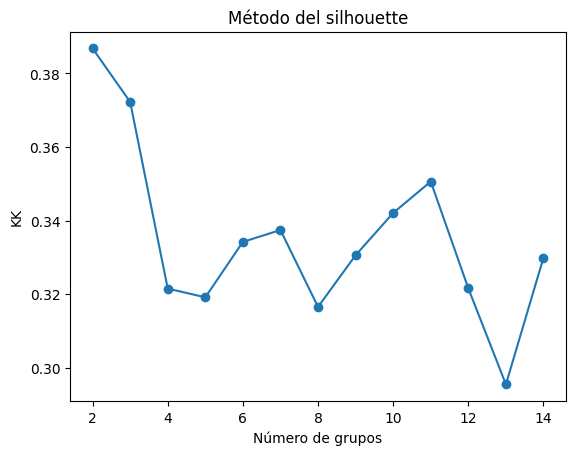

In [28]:
### Importar libreria
from sklearn.metrics import silhouette_score
from sklearn import metrics

import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_normalizado)

    predict = kmeans.predict(df_normalizado)
    silhouette_avg = metrics.silhouette_score(df_normalizado, predict)
    silhouette_scores.append(silhouette_avg)

# Gráfico del codo
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método del silhouette')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

### DATAFRAME CON PCA

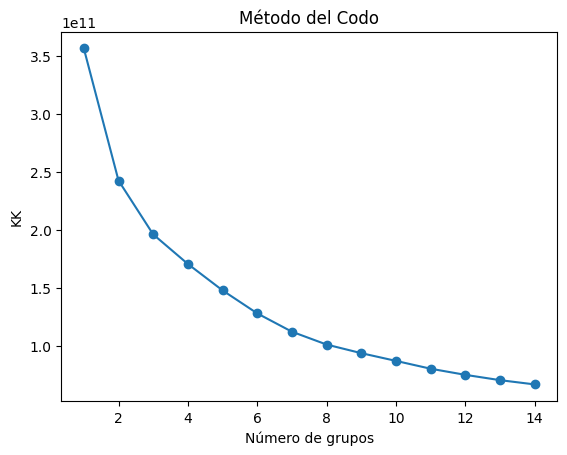

In [56]:
### Busqueda de El K
import matplotlib.pyplot as plt

KK = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca_df)
    KK.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 15), KK, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

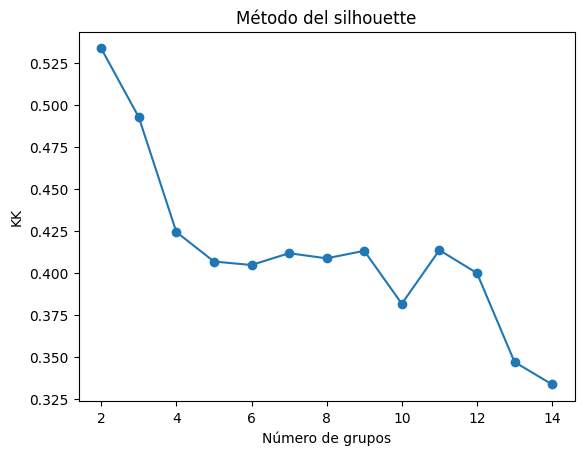

In [57]:
### Importar libreria
from sklearn.metrics import silhouette_score
from sklearn import metrics

import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca_df)

    predict = kmeans.predict(X_pca_df)
    silhouette_avg = metrics.silhouette_score(X_pca_df, predict)
    silhouette_scores.append(silhouette_avg)

# Gráfico del codo
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método del silhouette')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

## Desarrollo del modelo K-means


In [58]:
ideal_model = KMeans(n_clusters=3, n_init='auto', random_state=42)
ideal_model.fit(X_pca_df)

KMeans(n_clusters=3, random_state=42)

In [59]:
ideal_model.cluster_centers_[:, 0]

array([ 4878.91992507, -2079.87399316, 20135.4951114 ])

In [41]:
df.drop(['Cluster'], axis = 1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000          0.000000          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322          0.000000          0.000000       6  
8947    81

In [67]:
## Determinar y_train
y_train = list(ideal_model.labels_)

## Agregar el cluster correspondiente a cada conjunto de datos
df["Cluster"] = y_train
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000          0.000000          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        1

In [68]:
## Cantidad de registros por clusters

df.Cluster.value_counts()

Cluster
1    6554
0    2266
2     130
Name: count, dtype: int64

In [69]:
X = scaler.fit_transform(df)

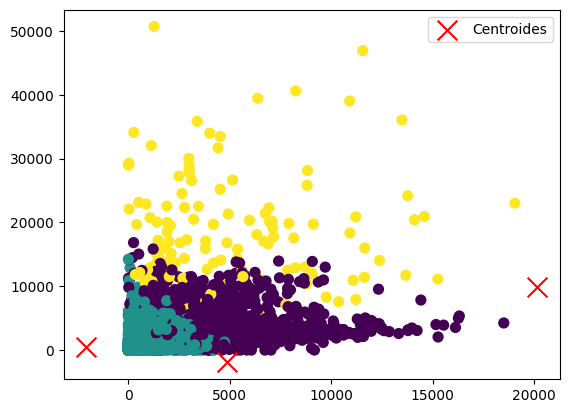

In [74]:
## Visualización de los clusters
plt.scatter(df.BALANCE, df.PAYMENTS, c=y_train, s=50, cmap='viridis')
plt.scatter(ideal_model.cluster_centers_[:, 0], ideal_model.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.legend()
plt.show()

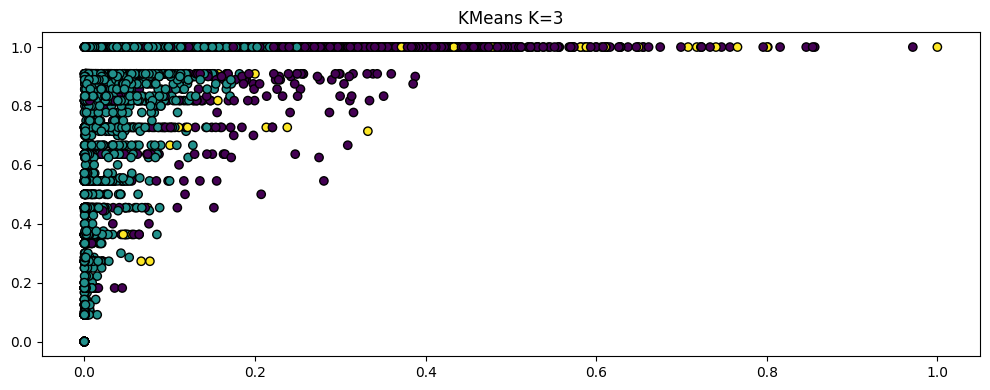

In [78]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.scatter(
        x = X[:, 0],
        y = X[:, 1], 
        c = list(ideal_model.labels_),
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax.set_title('KMeans K=3')
plt.tight_layout()
plt.show();

In [75]:
import seaborn as sns

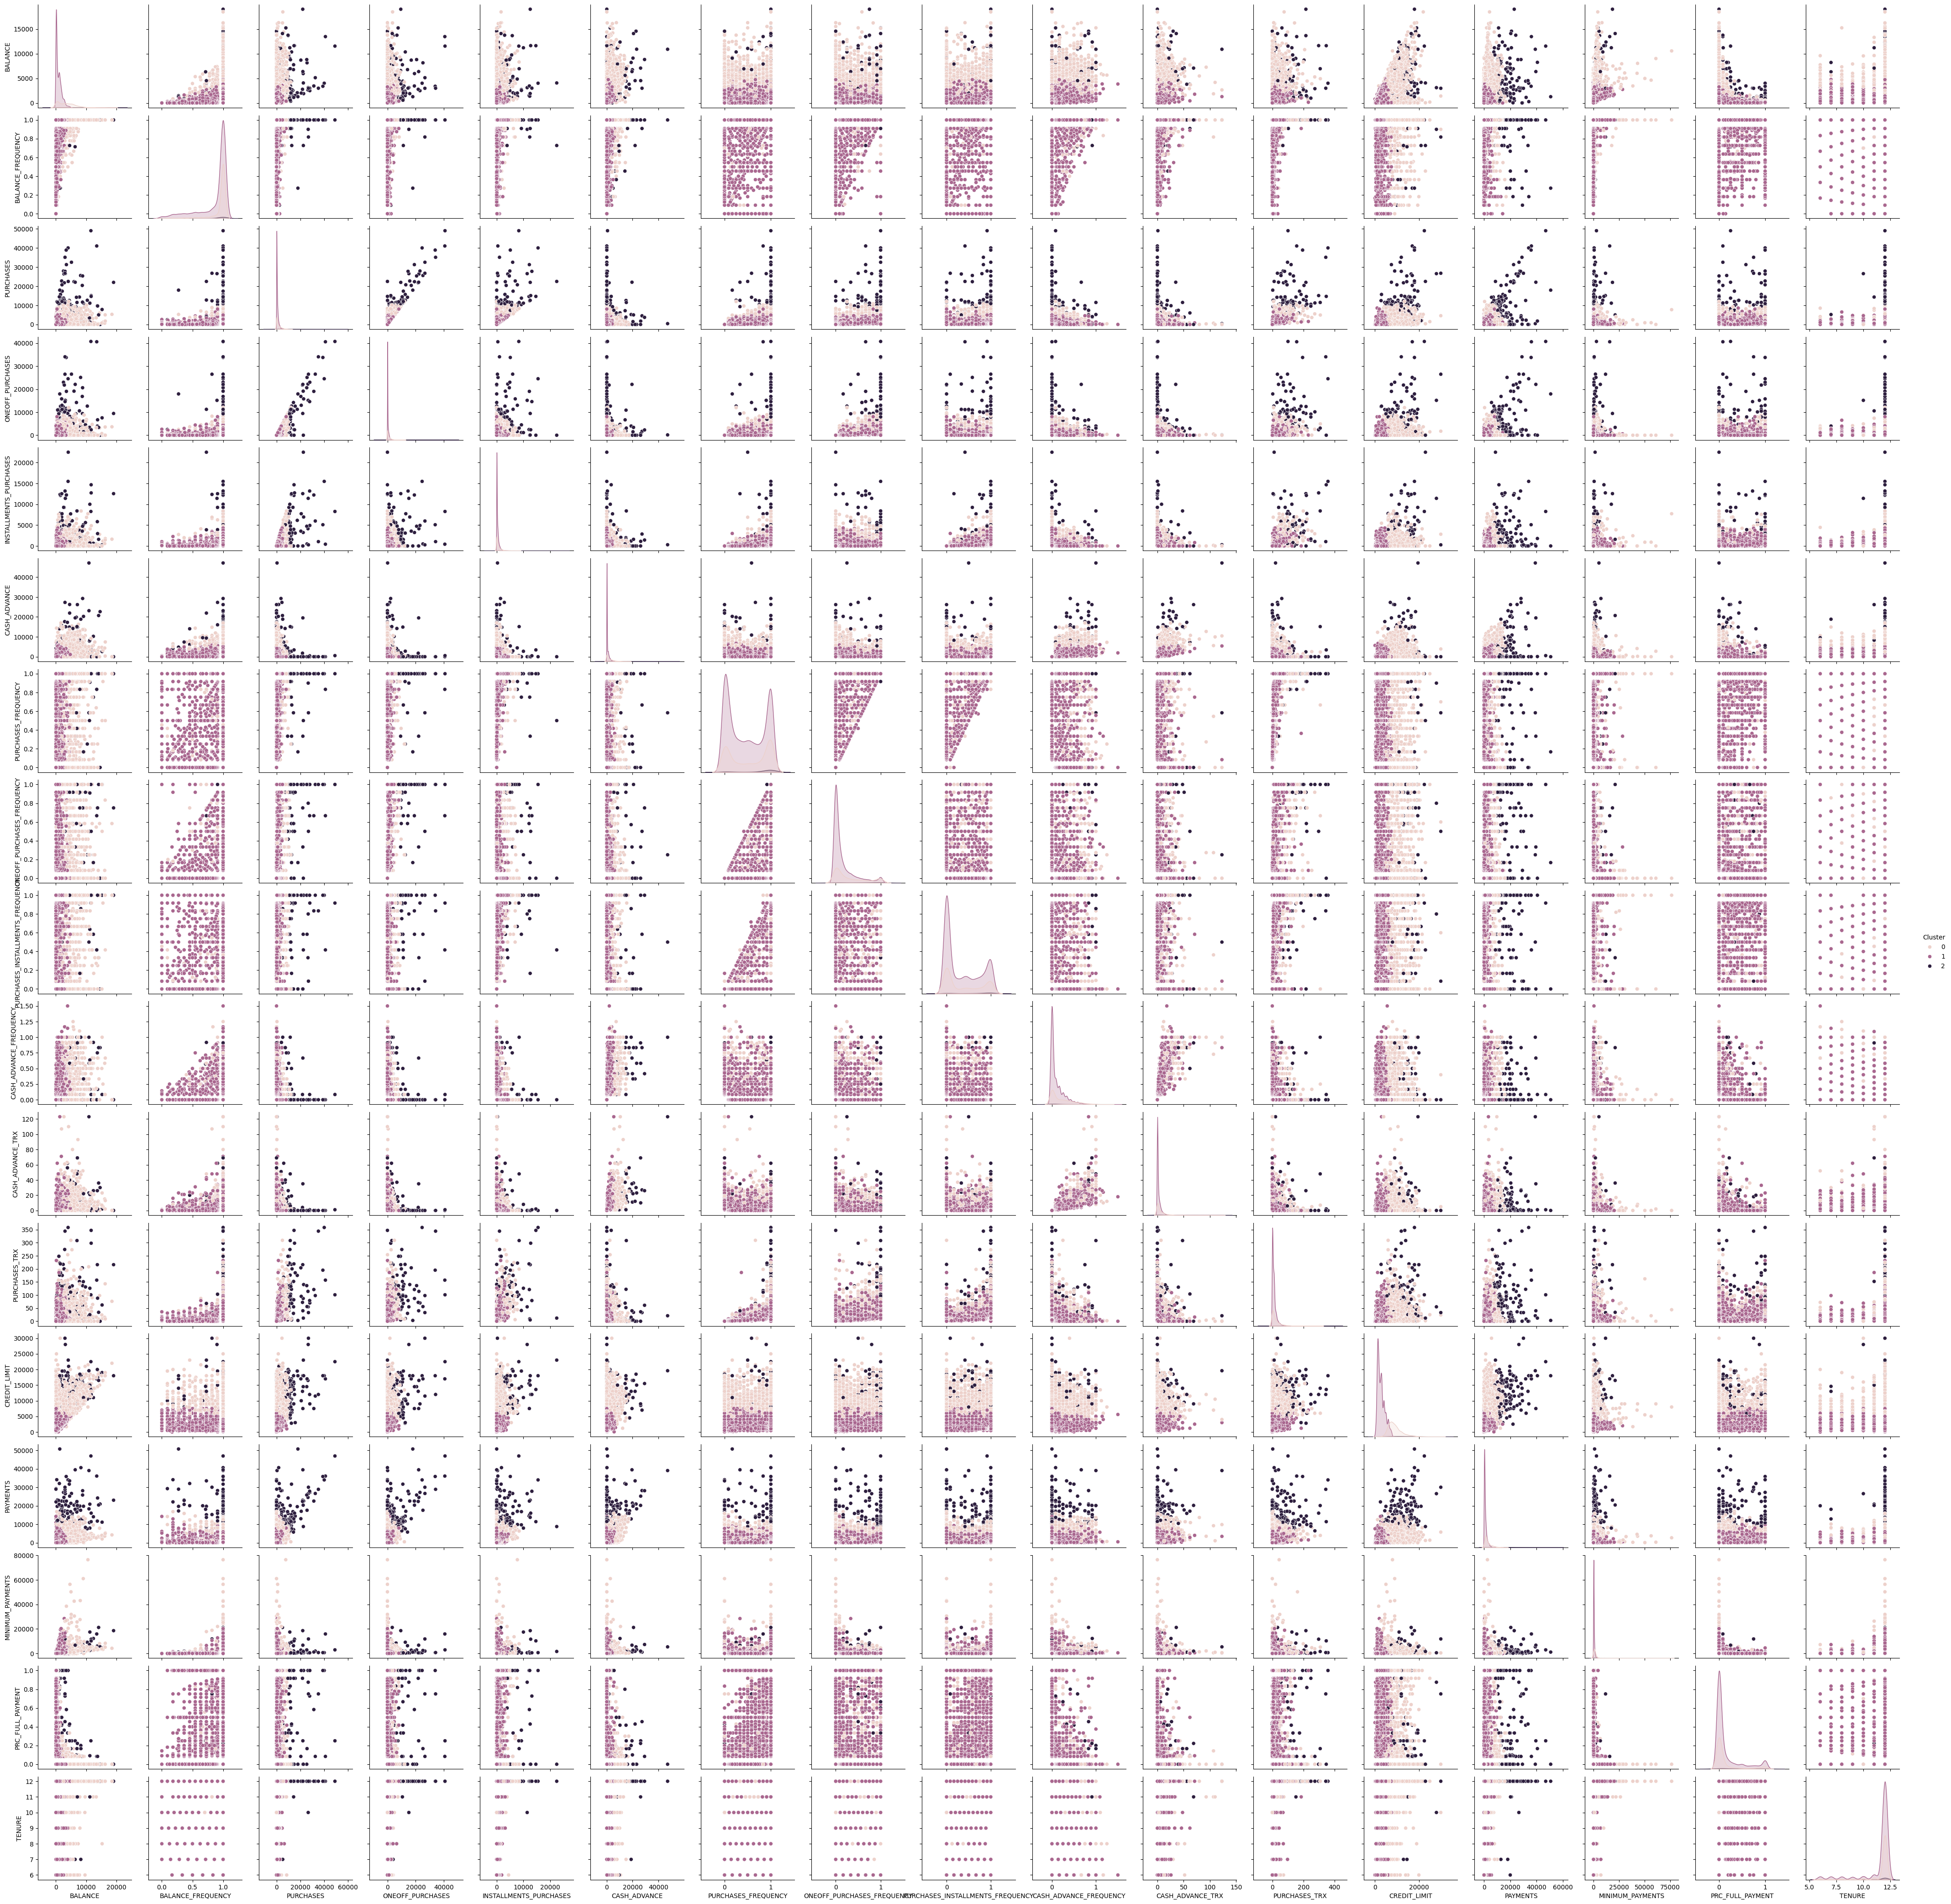

In [76]:
sns.pairplot(df,hue='Cluster')
plt.show()